<a href="https://colab.research.google.com/github/babaroscopy/colab/blob/main/ML_MLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from numpy import mean
from numpy import std
from sklearn.metrics import mean_squared_error

In [2]:
#Reading the dataset
df = pd.read_csv("pakwheels-11Jul2020.csv")

In [3]:
df.head()

,Ad No,Name,Price,Model Year,Location,Mileage,Registered City,Engine Type,Engine Capacity,Transmission,Color,Assembly,Body Type,Features,Last Updated,URL
0,4096758,Toyota Vitz F 1.0 2017,2385000.0,2017,"G- 8, Islamabad Islamabad",9869,Un-Registered,Petrol,1000 cc,Automatic,Silver,Imported,Hatchback,"ABS, AM/FM Radio, Air Bags, Air Conditioning,...","Jul 11, 2020",https://www.pakwheels.com/used-cars/toyota-vit...
1,4168305,Toyota Corolla GLi Automatic 1.3 VVTi 2019,111000.00000000001,2019,Peshawar KPK,11111,Islamabad,Petrol,1300 cc,Automatic,White,Local,Sedan,"ABS, AM/FM Radio, Air Bags, Air Conditioning,...","Jul 12, 2020",https://www.pakwheels.com/used-cars/toyota-cor...
2,4168298,Suzuki Alto VXL 2019,1530000.0,2019,"Akora Khattak, Nowshera KPK",17500,Un-Registered,Petrol,660 cc,Automatic,White,Local,Hatchback,"ABS, AM/FM Radio, Air Bags, Air Conditioning,...","Jul 12, 2020",https://www.pakwheels.com/used-cars/suzuki-alt...
3,4168307,Suzuki Alto VXR 2019,1650000.0,2019,"Abdullahpur, Faisalabad Punjab",9600,Lahore,Petrol,660 cc,Manual,White,Local,Hatchback,"AM/FM Radio, Air Bags, Air Conditioning, DVD ...","Jul 12, 2020",https://www.pakwheels.com/used-cars/suzuki-alt...
4,4168306,Toyota Corolla XLi VVTi 2010,1435000.0,2010,"9th Avenue, Islamabad Islamabad",120000,Islamabad,Petrol,1300 cc,Manual,Black,Local,Sedan,"AM/FM Radio, Air Conditioning, CD Player, Key...","Jul 12, 2020",https://www.pakwheels.com/used-cars/toyota-cor...


In [4]:
df.dtypes

Ad No               int64
Name               object
Price              object
Model Year          int64
Location           object
Mileage             int64
Registered City    object
Engine Type        object
Engine Capacity    object
Transmission       object
Color              object
Assembly           object
Body Type          object
Features           object
Last Updated       object
URL                object
dtype: object

In [6]:
df.dropna()

,Ad No,Name,Price,Model Year,Location,Mileage,Registered City,Engine Type,Engine Capacity,Transmission,Color,Assembly,Body Type,Features,Last Updated,URL
0,4096758,Toyota Vitz F 1.0 2017,2385000.0,2017,"G- 8, Islamabad Islamabad",9869,Un-Registered,Petrol,1000 cc,Automatic,Silver,Imported,Hatchback,"ABS, AM/FM Radio, Air Bags, Air Conditioning,...","Jul 11, 2020",https://www.pakwheels.com/used-cars/toyota-vit...
1,4168305,Toyota Corolla GLi Automatic 1.3 VVTi 2019,111000.00000000001,2019,Peshawar KPK,11111,Islamabad,Petrol,1300 cc,Automatic,White,Local,Sedan,"ABS, AM/FM Radio, Air Bags, Air Conditioning,...","Jul 12, 2020",https://www.pakwheels.com/used-cars/toyota-cor...
2,4168298,Suzuki Alto VXL 2019,1530000.0,2019,"Akora Khattak, Nowshera KPK",17500,Un-Registered,Petrol,660 cc,Automatic,White,Local,Hatchback,"ABS, AM/FM Radio, Air Bags, Air Conditioning,...","Jul 12, 2020",https://www.pakwheels.com/used-cars/suzuki-alt...
3,4168307,Suzuki Alto VXR 2019,1650000.0,2019,"Abdullahpur, Faisalabad Punjab",9600,Lahore,Petrol,660 cc,Manual,White,Local,Hatchback,"AM/FM Radio, Air Bags, Air Conditioning, DVD ...","Jul 12, 2020",https://www.pakwheels.com/used-cars/suzuki-alt...
4,4168306,Toyota Corolla XLi VVTi 2010,1435000.0,2010,"9th Avenue, Islamabad Islamabad",120000,Islamabad,Petrol,1300 cc,Manual,Black,Local,Sedan,"AM/FM Radio, Air Conditioning, CD Player, Key...","Jul 12, 2020",https://www.pakwheels.com/used-cars/toyota-cor...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56179,3737684,Toyota Aqua S 2015,2450000.0,2015,Rawalpindi Punjab,52000,Un-Registered,Petrol,1500 cc,Automatic,Blue,Imported,Hatchback,"ABS, AM/FM Radio, Air Bags, Air Conditioning,...","Dec 18, 2019",https://www.pakwheels.com/used-cars/toyota-aqu...
56181,3349017,Honda Civic VTi Prosmatec 1.8 i-VTEC 2015,3250000.0,2015,Lahore Punjab,125000,Lahore,Petrol,1800 cc,Automatic,Black,Local,Sedan,"ABS, AM/FM Radio, Air Bags, Air Conditioning,...","Jun 04, 2019",https://www.pakwheels.com/used-cars/honda-civi...
56183,3748215,Toyota Aqua G 2016,3000000.0,2016,Gujranwala Punjab,60000,Lahore,Petrol,1500 cc,Automatic,Black,Imported,Hatchback,"ABS, AM/FM Radio, Air Bags, Air Conditioning,...","Dec 22, 2019",https://www.pakwheels.com/used-cars/toyota-aqu...
56184,3785520,Honda Vezel Hybrid Z 2015,Call for price,2015,Multan Punjab,45000,Un-Registered,Hybrid,1500 cc,Automatic,Grey,Imported,Crossover,"ABS, AM/FM Radio, Air Bags, Air Conditioning,...","Jan 05, 2020",https://www.pakwheels.com/used-cars/honda-veze...


In [7]:

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [8]:

dataset=MultiColumnLabelEncoder(columns = ['Name', 'Price', 'Location','Registered City', 'Engine Type', 'Engine Capacity', 'Transmission','Color', 'Assembly','Body Type', 'Features','Last Updated', 'URL']).fit_transform(df)

In [ ]:
#flags_ohe = df
#categorical_columns = ['Name', 'Price', 'Location','Registered City', 'Engine Type','Engine Capacity', 'Transmission','Color', 'Assembly','Body Type', 'Features','Last Updated', 'URL']
#for col in categorical_columns:
#    col_ohe = pd.get_dummies(df[col], prefix=col)
#    flags_ohe = pd.concat((flags_ohe, col_ohe), axis=1).drop(col, axis=1)

In [ ]:
#from sklearn.compose import make_column_transformer
#from sklearn.preprocessing import RobustScaler
#from sklearn.preprocessing import OneHotEncoder

#categorical_columns = ['Name', 'Price', 'Location','Registered City', 'Engine Type','Engine Capacity', 'Transmission','Color', 'Assembly','Body Type', 'Features','Last Updated', 'URL']
#numerical_columns = ['Ad No', 'Model Year', 'Mileage']
#column_trans = make_column_transformer(
#    (categorical_columns, OneHotEncoder(handle_unknown='ignore')),(numerical_columns, RobustScaler()))
#column_trans.fit_transform(df)

In [ ]:
#df["Last Updated"]

In [ ]:
#df = df.drop('Last Updated', axis = 1)

In [ ]:
#for i in range(len(dataset["Price"])):
#    if(dataset["Price"][i]=="Call for price")
#          dataset["Price"][i]=0

In [ ]:
df.dtypes

Ad No               int64
Name               object
Price              object
Model Year          int64
Location           object
Mileage             int64
Registered City    object
Engine Type        object
Engine Capacity    object
Transmission       object
Color              object
Assembly           object
Body Type          object
Features           object
Last Updated       object
URL                object
dtype: object

In [9]:
#Setting the value for X and Y
x = dataset.drop('Price', axis = 1)
y = dataset[["Price"]]
y.head()

,Price
0,526
1,47
2,234
3,282
4,192


In [10]:
x.head()

,Ad No,Name,Model Year,Location,Mileage,Registered City,Engine Type,Engine Capacity,Transmission,Color,Assembly,Body Type,Features,Last Updated,URL
0,4096758,7157,2017,660,9869,132,2,1,0,18,0,4,1336,291,55833
1,4168305,5490,2019,1620,11111,46,2,9,0,21,1,13,1343,293,47166
2,4168298,3652,2019,84,17500,132,2,94,0,21,1,4,1576,293,20895
3,4168307,3679,2019,36,9600,70,2,94,1,21,1,4,2979,293,20560
4,4168306,5610,2010,4,120000,46,2,9,1,2,1,13,3935,293,41467


Train Test

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)

In [12]:
print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)

(44948, 15) (44948, 1)
(11238, 15) (11238, 1)


In [13]:
#Fitting the Multiple Linear Regression model
mlr = LinearRegression()  
mlr.fit(x_train, y_train)

LinearRegression()

In [14]:
#Intercept and Coefficient
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))

Intercept:  [29722.63810344]
Coefficients:


[('Ad No',
  array([-9.28839556e-05,  1.91956194e-02, -1.42450477e+01, -3.81075371e-03,
         -6.93718572e-04,  9.64159206e-01, -7.65114681e+01,  1.08812992e+00,
         -8.22186174e+00,  9.00689796e-01,  1.72843313e+02, -8.44807827e+00,
          4.30736719e-02, -1.70429879e-02, -3.53888891e-03]))]

In [15]:
#Prediction of test set
y_pred_mlr= mlr.predict(x_test)
#Predicted values
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [[ 566.0370461 ]
 [ 458.43634586]
 [ 834.59048515]
 ...
 [ 667.89172541]
 [1098.74219013]
 [ 474.26601494]]


Text(0, 0.5, 'Predictions')

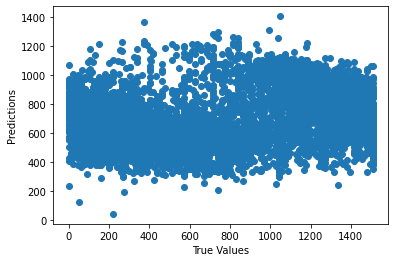

In [16]:
## The line / model
plt.scatter(y_test, y_pred_mlr)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [17]:
print ("Score:", mlr.score(x_test, y_test))

Score: 0.11918569162225146


In [18]:
#Model Evaluation
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('Root Mean Square Error:', rootMeanSqErr)

Root Mean Square Error: 457.303440496812


KFold Cross Validation

In [20]:
regressor=LinearRegression() #Linear regression

#NUMBER OF FOLDS REQUIRED MAYBE CONTROLLED HERE USING K
k=10 #change k according to number of folds(Default=10)

kf=KFold(n_splits=k, random_state=1, shuffle=True)  #Splitting the folds k times

In [27]:
#Iteration control
i=1
#lists to store metrics
mae=[]
mse=[]
rmse=[]
r2=[]

for train_index, test_index in kf.split(x):
    print('ITERATION: ',i)
    i=i+1

    #splitting
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    #fitting
    regressor.fit(x_train, y_train)

    # To retrieve the intercept:
    print('Intercept: ',regressor.intercept_)
    # For printing the coefficients:
    print("Coefficients: ")
    print(regressor.coef_)

    #predicting
    y_pred = regressor.predict(x_test)

    #plotting if necessary
    # plt.scatter(X_test['Xg'],y_test,label="Tester")
    # plt.scatter(X_test['Xg'],y_pred,label="Predicted")
    # plt.legend()
    # plt.show()

    #Calculating metrics
    ma= metrics.mean_absolute_error(y_test, y_pred)
    ms= metrics.mean_squared_error(y_test, y_pred)
    mrm= np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    mr2= metrics.r2_score(y_test, y_pred)
    #appending metrics
    mae.append(ma)
    mse.append(ms)
    rmse.append(mrm)
    r2.append(mr2)
    #printing metrics for fit
    print ("Score:", mlr.score(x_test, y_test))
    print('Mean Absolute Error:',ma)
    print('Mean Squared Error:',ms)
    print('Root Mean Squared Error:',mrm)
    print('R^2 score:',mr2)

#Printing mean values of metrics
print("AVERAGE METRICS:")
print('Average Mean Absolute Error:',np.mean(np.array(mae)))
print('Average Mean Squared Error:', np.mean(np.array(mse)))
print('Average Root Mean Squared Error:', np.mean(np.array(rmse)))
print('Average R^2 score:', np.mean(np.array(r2)))

ITERATION:  1
Intercept:  [30356.0713805]
Coefficients: 
[[-8.58180379e-05  1.33070055e-02 -1.45744283e+01 -1.92068117e-03
  -6.97401818e-04  9.95706346e-01 -7.38184421e+01  1.13265941e+00
  -6.27477982e+00  8.61723007e-01  1.68689789e+02 -8.54065443e+00
   4.27770065e-02 -1.92891309e-02 -2.91861500e-03]]
Score: 0.12242118998797313
Mean Absolute Error: 385.5816512188963
Mean Squared Error: 205055.73432070675
Root Mean Squared Error: 452.830800984989
R^2 score: 0.1220913659134727
ITERATION:  2
Intercept:  [29997.94727695]
Coefficients: 
[[-7.91151261e-05  1.80887892e-02 -1.44072831e+01 -2.71830501e-03
  -7.07266126e-04  9.55020551e-01 -7.45292439e+01  1.14537160e+00
  -6.89960010e+00  8.01318718e-01  1.71014296e+02 -8.37907243e+00
   4.23440586e-02 -3.23688433e-02 -3.45270168e-03]]
Score: 0.11933144491367542
Mean Absolute Error: 385.44756123035967
Mean Squared Error: 206998.462254891
Root Mean Squared Error: 454.97083670812464
R^2 score: 0.11894865488932094
ITERATION:  3
Intercept:  [30

In [ ]:

# Perform 6-fold cross validation
#scores = cross_val_score(mlr, x, y, cv=5)
#print ("Cross-validated scores:", scores)

Cross-validated scores: [0.03587334 0.15104649 0.15387081 0.15203264 0.02526282]


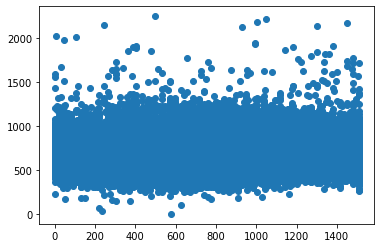

In [ ]:
# Make cross validated predictions
#predictions = cross_val_predict(mlr, x, y, cv=5)
#plt.scatter(y, predictions)

In [ ]:
# prepare the cross-validation procedure
#cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# create model
#kmlr = LinearRegression()
# evaluate model
#scores = cross_val_score(kmlr, x_train, y_train, cv=cv)
# report performance
#print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
#rmse
#score = cross_val_score(kmlr, x_train, y_train,scoring="neg_root_mean_squared_error", cv=cv)
# report performance
#print('RMSE: %.3f (%.3f)' % (mean(score), std(score)))

Accuracy: 0.125 (0.009)
RMSE: -454.321 (2.990)
